In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math

In [2]:
# Load the TSV file, using header=None since there is no header row
df_train = pd.read_csv('InsectEPGSmallTrain_TRAIN.tsv', sep='\t', header=None)
df_test = pd.read_csv('InsectEPGSmallTrain_TEST.tsv', sep='\t', header=None)

In [3]:
#  Separate labels and data of train 
labels_train = df_train.iloc[:, 0].values        
data_train = df_train.iloc[:, 1:]     
print("train Labels shape:", labels_train.shape)
print("train Data shape: ", data_train.shape)

train Labels shape: (17,)
train Data shape:  (17, 601)


In [4]:
#  Separate labels and data of test 
labels_test = df_test.iloc[:, 0].values        
data_test = df_test.iloc[:, 1:]     
print("test Labels shape:", labels_test.shape)
print("test Data shape: ", data_test.shape)

test Labels shape: (249,)
test Data shape:  (249, 601)


In [5]:
#  Verify there are no missing values
print("\nAny missing values in the train dataset?", data_train.isnull().any().any())
print("\nAny missing values in the test dataset?", data_test.isnull().any().any())


Any missing values in the train dataset? False

Any missing values in the test dataset? False


In [6]:
print(data_train.head())
print(data_test.head())

      1       2       3       4       5       6       7       8       9    \
0  2.4915  2.4890  2.4902  2.4902  2.4915  2.4915  2.4890  2.4902  2.4866   
1  2.4414  2.4451  2.4475  2.4438  2.4463  2.4438  2.4451  2.4463  2.4463   
2  2.7148  2.7173  2.7185  2.7173  2.7197  2.7185  2.7197  2.7161  2.7185   
3  2.4719  2.4731  2.4719  2.4707  2.4719  2.4731  2.4719  2.4731  2.4731   
4  2.8491  2.8503  2.8491  2.8516  2.8503  2.8516  2.8516  2.8491  2.8528   

      10   ...     592     593     594     595     596     597     598  \
0  2.4878  ...  2.4463  2.4451  2.4451  2.4438  2.4463  2.4500  2.4463   
1  2.4438  ...  2.2278  2.2278  2.2290  2.2266  2.2241  2.2278  2.2266   
2  2.7173  ...  2.5830  2.5842  2.5830  2.5830  2.5842  2.5854  2.5854   
3  2.4731  ...  2.4438  2.4438  2.4402  2.4438  2.4438  2.4426  2.4451   
4  2.8528  ...  2.6648  2.6624  2.6648  2.6636  2.6648  2.6648  2.6636   

      599     600     601  
0  2.4463  2.4451  2.4451  
1  2.2253  2.2253  2.2266  
2  2.585

Plotting sample idx = 0


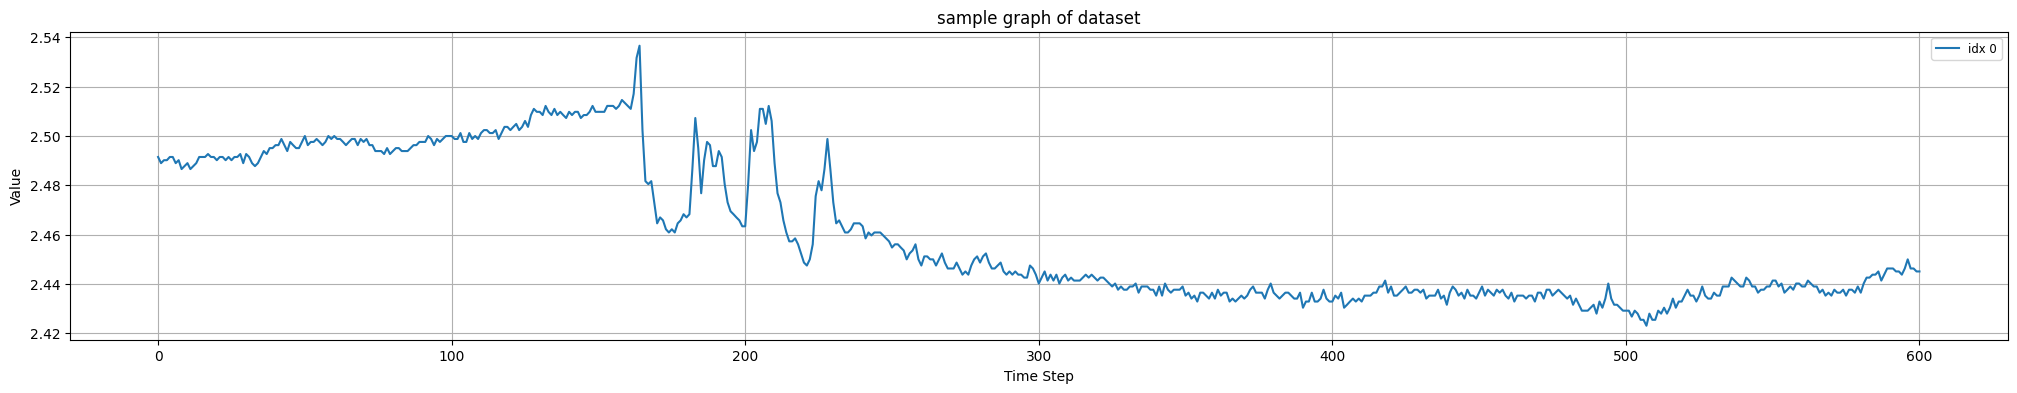

In [7]:
plt.figure(figsize=(25, 4))
count = 0
for i in range(len(labels_train)):
    if labels_train[i] == 1:
        print(f"Plotting sample idx = {i}")
        plt.plot(data_train.iloc[i].values,label=f"idx {i}")
        count += 1
        if count == 1:
            break
plt.title("sample graph of dataset")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend(loc="upper right", fontsize="small")
plt.grid(True)
plt.show()

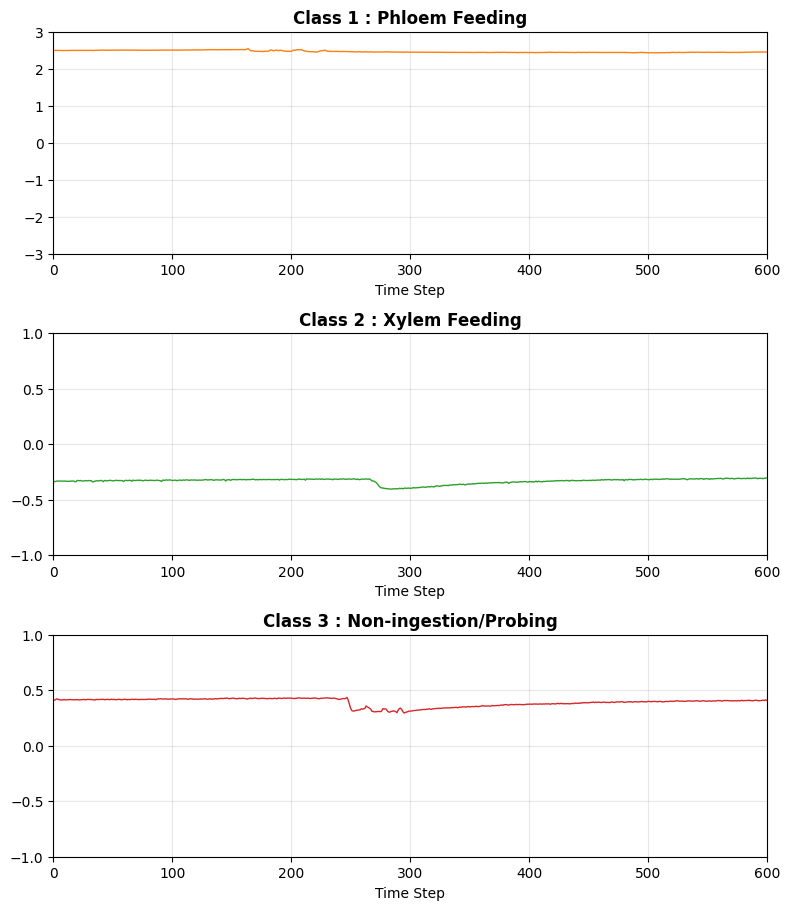

In [8]:
# Map numeric labels to human-readable names
class_names = {
    1: "Phloem Feeding",
    2: "Xylem Feeding",
    3: "Non-ingestion/Probing"
}

colors = plt.cm.tab10.colors
ticks = np.arange(0, 601, 100)

fig, axes = plt.subplots(4, 1, figsize=(8, 12), sharex=False)

for cls, ax in zip(range(4), axes):
    # find the first example of this class
    idxs = np.where(labels_train == cls)[0]
    if len(idxs) == 0:
        ax.set_visible(False)
        continue
    idx = idxs[0]
    series = data_train.iloc[idx].values

    # plot
    ax.plot(series, color=colors[cls], linewidth=1)

    # X-axis ticks and labels on every subplot
    ax.set_xticks(ticks)
    ax.set_xticklabels(ticks)
    ax.set_xlim(0, 600)

    # Y-axis symmetric limit
    max_abs = max(abs(series.min()), abs(series.max()))
    if max_abs <= 5:
        y_lim = math.ceil(max_abs)
    else:
        y_lim = math.ceil(max_abs / 5) * 5
    ax.set_ylim(-y_lim, y_lim)

    # Title centered
    ax.set_title(f"Class {cls} : {class_names[cls]}", fontsize=12, fontweight="bold")
    ax.grid(True, alpha=0.3)

# Add a shared X label underneath all subplots
for ax in axes:
    ax.set_xlabel("Time Step")

plt.tight_layout(h_pad=1.0)
plt.show()

C:\Users\kisha\AppData\Local\Temp\ipykernel_18412\2898751996.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


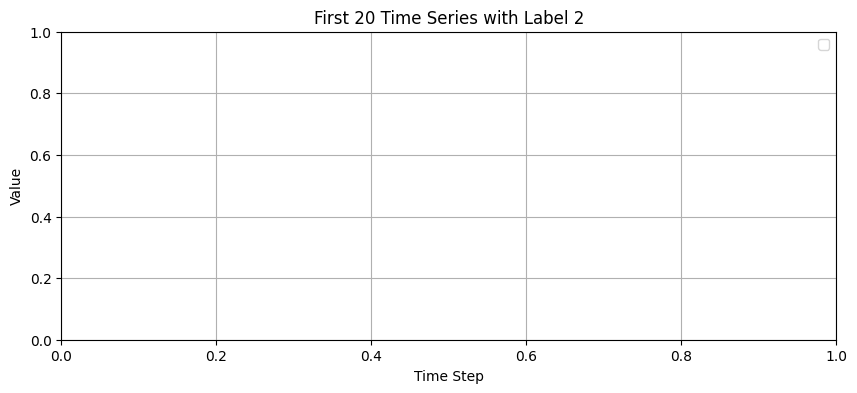

In [9]:
plt.figure(figsize=(10, 4))
count = 0
for i in range(len(labels_train)):
    if labels_train[i] == 4:
        plt.plot(data_train.iloc[i].values, label=f"idx {i}")
        count += 1
        if count == 5:
            break
plt.title("First 20 Time Series with Label 2")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.grid()
plt.show()

C:\Users\kisha\AppData\Local\Temp\ipykernel_18412\1983811856.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


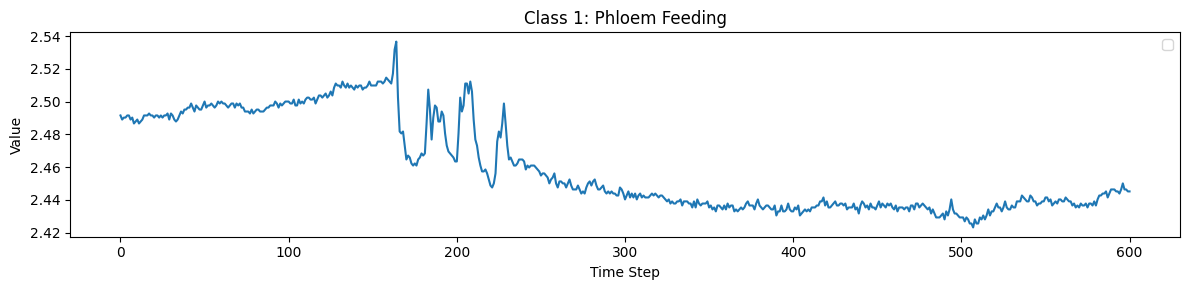

C:\Users\kisha\AppData\Local\Temp\ipykernel_18412\1983811856.py:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


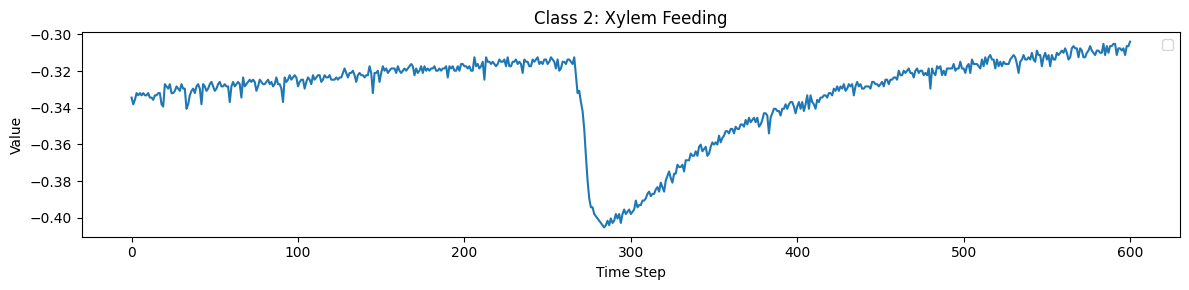

C:\Users\kisha\AppData\Local\Temp\ipykernel_18412\1983811856.py:30: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


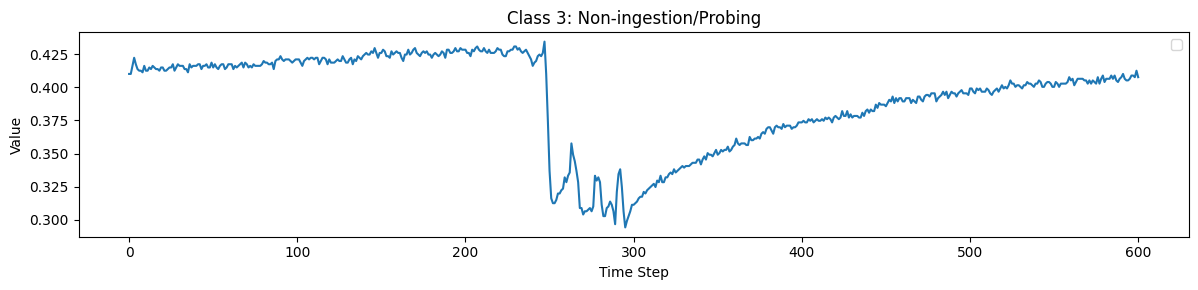

In [10]:
P = data_train.iloc[0].values
q = data_train.iloc[6].values
r = data_train.iloc[14].values
first_label = labels_train[0]
second_label = labels_train[6]
third_label = labels_train[14]
plt.figure(figsize=(12, 3))
plt.plot(P)
plt.title("Class 1: Phloem Feeding")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.savefig("InsectEPGSmallTrainclass1.pdf", bbox_inches='tight')
plt.show()
plt.figure(figsize=(12, 3))
plt.plot(q)
plt.title("Class 2: Xylem Feeding")
plt.xlabel("Time Step")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.savefig("InsectEPGSmallTrainclass2.pdf", bbox_inches='tight')
plt.show()
plt.figure(figsize=(12, 3))
plt.plot(r)
plt.title("Class 3: Non-ingestion/Probing")
plt.xlabel("Time Step") 
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.savefig("InsectEPGSmallTrainclass3.pdf", bbox_inches='tight')
plt.show()